Training data shape: (60000, 784)
Test data shape: (10000, 784)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3464 - val_loss: 0.1806
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1685 - val_loss: 0.1415
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1383 - val_loss: 0.1260
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1250 - val_loss: 0.1183
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1187 - val_loss: 0.1138
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1140 - val_loss: 0.1105
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1112 - val_loss: 0.1076
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1083 - val_loss: 0.1047
Epoch 9/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1055 - val_loss: 0.1029
Epoch 10/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1035 - val_loss: 0.1009
Epoch 11/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1016 - val_loss: 0.0995
Epoch 12/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

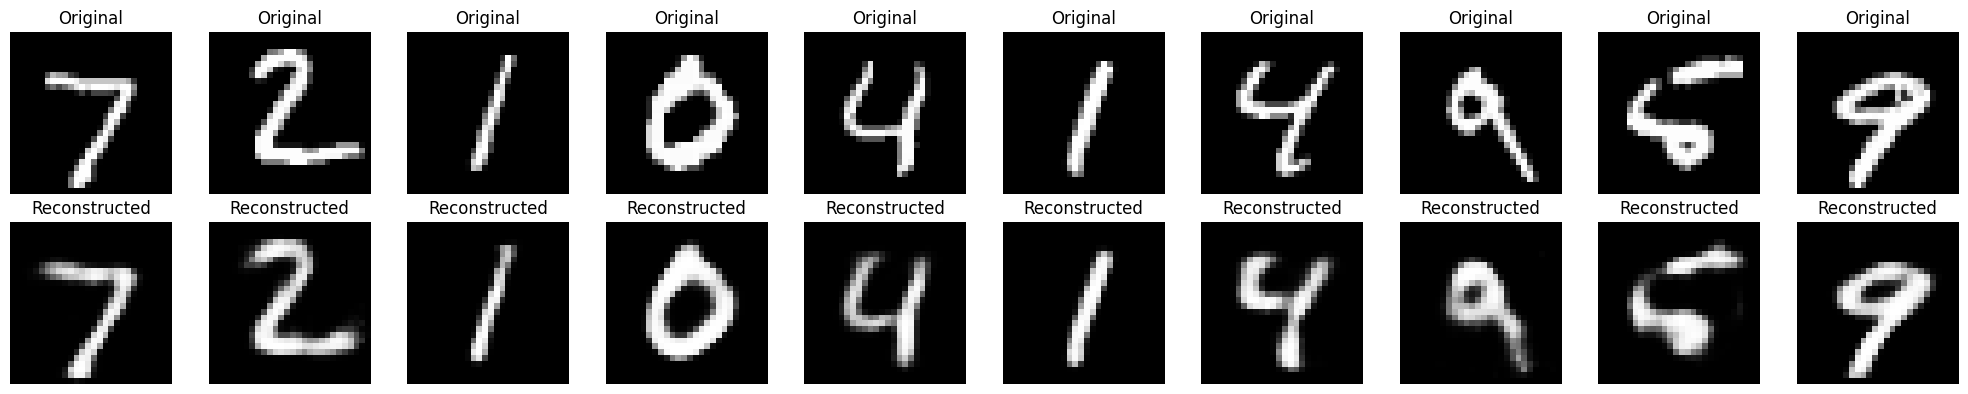

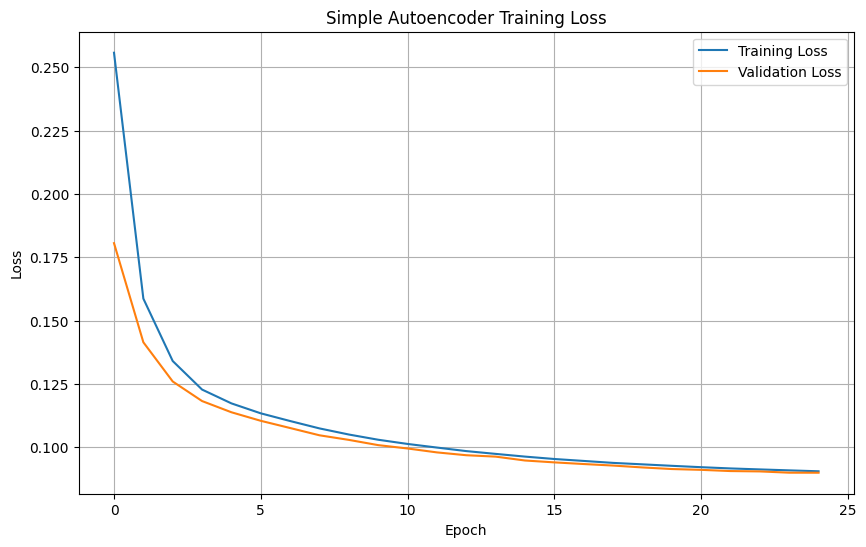

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images (28x28 -> 784)
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

# Build Simple Autoencoder
def build_simple_autoencoder():
    # Input layer
    input_img = keras.Input(shape=(784,))
    
    # Encoder
    encoded = layers.Dense(128, activation='relu')(input_img)
    encoded = layers.Dense(64, activation='relu')(encoded)
    encoded = layers.Dense(32, activation='relu')(encoded) 
    
    # Decoder
    decoded = layers.Dense(64, activation='relu')(encoded)
    decoded = layers.Dense(128, activation='relu')(decoded)
    decoded = layers.Dense(784, activation='sigmoid')(decoded)  
    
    # Create autoencoder model
    autoencoder = keras.Model(input_img, decoded)
    
    return autoencoder

autoencoder = build_simple_autoencoder()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Print model summary
autoencoder.summary()

history = autoencoder.fit(x_train, x_train,
                         epochs=25,
                         batch_size=256,
                         shuffle=True,
                         validation_data=(x_test, x_test))

# Test the autoencoder
encoded_imgs = autoencoder.predict(x_test)
def plot_results(original, reconstructed, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Original images
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        plt.title("Original")
        plt.axis('off')

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
        plt.title("Reconstructed")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Plot results
plot_results(x_test, encoded_imgs)
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Simple Autoencoder Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 8)        │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 16)       │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,785 (49.94 KB)

 Trainable params: 12,785 (49.94 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.2929 - val_loss: 0.1294
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.1255 - val_loss: 0.1143
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.1139 - val_loss: 0.1078
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.1085 - val_loss: 0.1041
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.1046 - val_loss: 0.1018
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.1022 - val_loss: 0.0993
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.1001 - val_loss: 0.0978
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.0986 - val_loss: 0.0965
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.0971 - val_loss: 0.0960
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.0962 - val_loss: 0.0942
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.0954 - val_loss: 0.0938
Epoch 12/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 

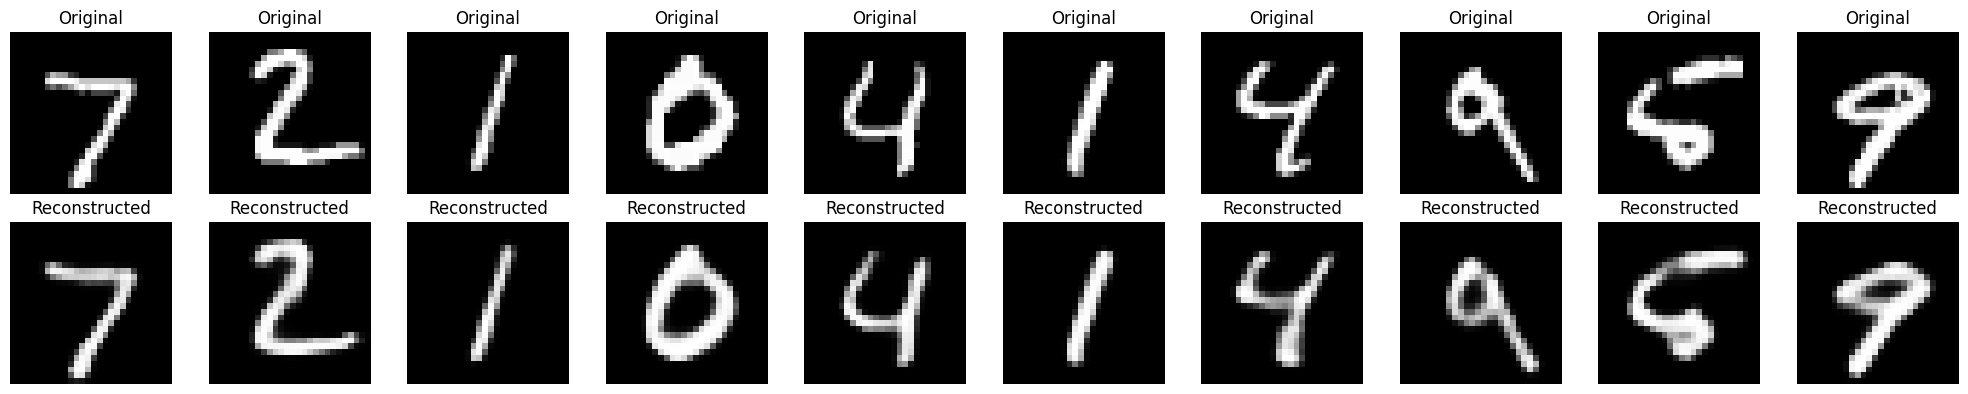

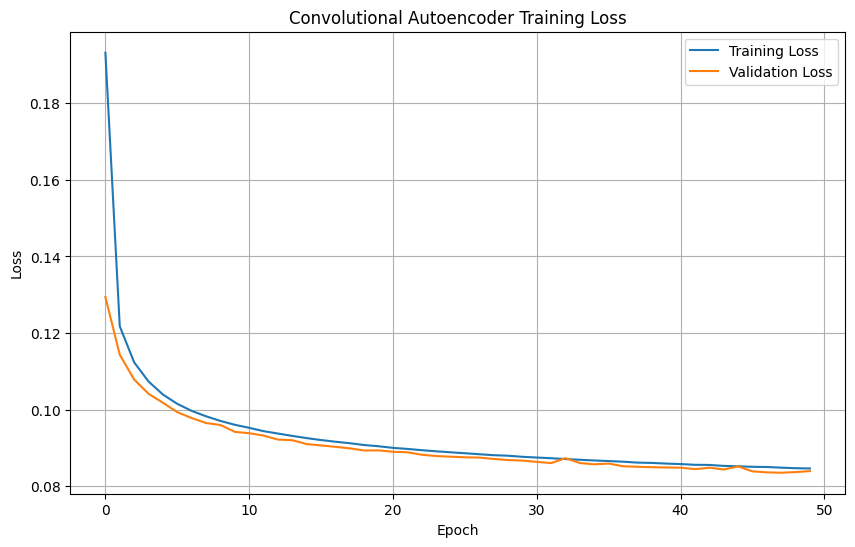

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

def build_conv_autoencoder():
    # Input layer
    input_img = keras.Input(shape=(28, 28, 1))
    
    # Encoder
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)
    
    # Decoder
    x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
    
    autoencoder = keras.Model(input_img, decoded)
    
    return autoencoder
conv_autoencoder = build_conv_autoencoder()
conv_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
conv_autoencoder.summary()
history = conv_autoencoder.fit(x_train, x_train,
                              epochs=50,
                              batch_size=128,
                              shuffle=True,
                              validation_data=(x_test, x_test))

# Test
decoded_imgs = conv_autoencoder.predict(x_test)

# 
def plot_conv_results(original, reconstructed, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Original images
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        plt.title("Original")
        plt.axis('off')
        
        # Reconstructed images
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
        plt.title("Reconstructed")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Plot results
plot_conv_results(x_test, decoded_imgs)

# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Convolutional Autoencoder Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Training Denoising Autoencoder...
Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - loss: 0.3121
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.1284
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1179
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1119
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1090
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1072
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.1056
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.1042
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1033
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1026
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.1017
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - loss: 0.1015
Epoch 13/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 94ms/step - loss: 0.1009
Epoch 14/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 75ms/step - loss: 0.1005
Epoch 

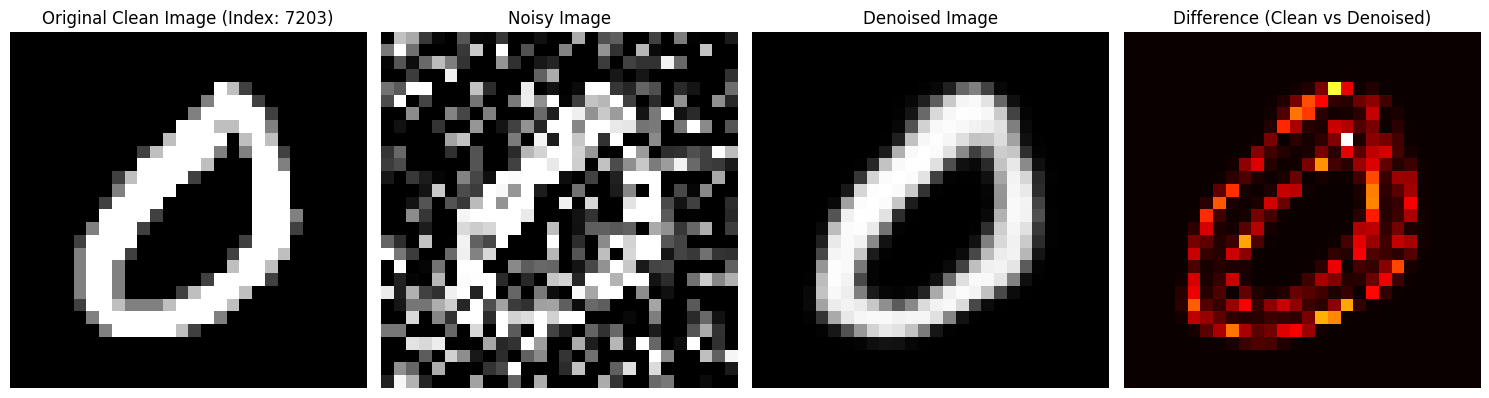

Noise Error (MSE): 0.129325
Denoising Error (MSE): 0.008903
Improvement: 0.120421


In [5]:
from tabnanny import verbose
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess MNIST dataset
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Add noise function
def add_noise(data, noise_factor=0.5):
    noisy_data = data + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data.shape)
    noisy_data = np.clip(noisy_data, 0., 1.)
    return noisy_data

# Create noisy training data
x_train_noisy = add_noise(x_train, noise_factor=0.5)

# Build Denoising Autoencoder
def build_denoising_autoencoder():
    input_img = keras.Input(shape=(28, 28, 1))
    
    # Encoder
    x = keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)
    x = keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    encoded = keras.layers.MaxPooling2D((2, 2), padding='same')(x)
    
    # Decoder
    x = keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
    x = keras.layers.UpSampling2D((2, 2))(x)
    x = keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = keras.layers.UpSampling2D((2, 2))(x)
    decoded = keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
    
    autoencoder = keras.Model(input_img, decoded)
    return autoencoder

# Train the model
model = build_denoising_autoencoder()
model.compile(optimizer='adam', loss='binary_crossentropy')
print("Training Denoising Autoencoder...")
model.fit(x_train_noisy, x_train, epochs=50,batch_size=256, verbose=1)
# SINGLE IMAGE PREDICTION
# Select a random test image
idx = np.random.randint(0, x_test.shape[0])
clean_img = x_test[idx]

# Add noise to the clean image
noisy_img = add_noise(clean_img[np.newaxis, ...], noise_factor=0.5)[0]

# Display images
plt.figure(figsize=(15, 4))

# Original clean image
plt.subplot(1, 4, 1)
plt.imshow(clean_img.squeeze(), cmap='gray')
plt.title(f'Original Clean Image (Index: {idx})')
plt.axis('off')

# Noisy image
plt.subplot(1, 4, 2)
plt.imshow(noisy_img.squeeze(), cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

# Predict (denoise) the image
denoised = model.predict(noisy_img[np.newaxis, ...])
print(f'Clean image shape: {clean_img.shape}')
print(f'Noisy image shape: {noisy_img.shape}')
print(f'Noisy with batch dimension: {noisy_img[np.newaxis, ...].shape}')
print(f'Denoised shape: {denoised.shape}')

# Display denoised image
plt.subplot(1, 4, 3)
plt.imshow(denoised[0].squeeze(), cmap='gray')
plt.title('Denoised Image')
plt.axis('off')

# Display difference between clean and denoised
difference = np.abs(clean_img.squeeze() - denoised[0].squeeze())
plt.subplot(1, 4, 4)
plt.imshow(difference, cmap='hot')
plt.title('Difference (Clean vs Denoised)')
plt.axis('off')

plt.tight_layout()
plt.show()

# Calculate errors
noise_error = np.mean((clean_img - noisy_img)**2)
denoising_error = np.mean((clean_img - denoised[0])**2)
print(f'Noise Error (MSE): {noise_error:.6f}')
print(f'Denoising Error (MSE): {denoising_error:.6f}')
print(f'Improvement: {noise_error - denoising_error:.6f}')